In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import catboost as cb
from sklearn.preprocessing import LabelEncoder
import time

In [31]:
pd.options.mode.chained_assignment = None

In [33]:
data = pd.read_csv('../common/Weather_data.csv', sep=',')

In [34]:
data.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

In [36]:
data1 = data.copy()

In [37]:
data1.RainToday.value_counts()

No     2422
Yes     849
Name: RainToday, dtype: int64

In [38]:
rain = {'No' : 0, 'Yes' : 1}

data1['RainToday'] = data1['RainToday'].map(rain)

In [39]:
data1.duplicated().sum()

0

In [40]:
data1.isna().sum()

Date             0
Temp9am          0
Temp3pm          0
MinTemp          0
MaxTemp          0
Rainfall         0
RainToday        0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
dtype: int64

In [41]:
Le = LabelEncoder()
data1['WindGustDir']=Le.fit_transform(data1['WindGustDir'])
data1['WindDir9am']=Le.fit_transform(data1['WindDir9am'])
data1['WindDir3pm']=Le.fit_transform(data1['WindDir3pm'])

In [42]:
data1.drop('Date', axis=1, inplace=True)

In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp9am        3271 non-null   float64
 1   Temp3pm        3271 non-null   float64
 2   MinTemp        3271 non-null   float64
 3   MaxTemp        3271 non-null   float64
 4   Rainfall       3271 non-null   float64
 5   RainToday      3271 non-null   int64  
 6   Evaporation    3271 non-null   float64
 7   Sunshine       3271 non-null   float64
 8   WindGustDir    3271 non-null   int32  
 9   WindGustSpeed  3271 non-null   int64  
 10  WindDir9am     3271 non-null   int32  
 11  WindDir3pm     3271 non-null   int32  
 12  WindSpeed9am   3271 non-null   int64  
 13  WindSpeed3pm   3271 non-null   int64  
 14  Humidity9am    3271 non-null   int64  
 15  Humidity3pm    3271 non-null   int64  
 16  Pressure9am    3271 non-null   float64
 17  Pressure3pm    3271 non-null   float64
 18  Cloud9am

In [56]:
data

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,10.5,17.9,8.6,19.6,0.0,No,2.0,7.8,SSE,...,W,SSE,22,20,73,52,1025.9,1025.3,2,2
3267,12-01-22,11.0,18.7,9.3,19.2,0.0,No,2.0,9.2,W,...,W,ESE,20,7,78,53,1028.5,1024.6,2,2
3268,13-01-22,10.2,17.3,9.4,17.7,0.0,No,2.4,2.7,W,...,WNW,N,15,13,85,56,1020.8,1015.0,6,6
3269,14-01-22,12.4,19.0,10.1,19.3,0.0,No,1.4,9.3,W,...,W,W,17,19,56,35,1017.3,1015.1,5,2


In [44]:
predictors = data1.loc[:, ~data1.columns.isin(['RainToday'])]
target = data1['RainToday']
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size = 0.8, shuffle = True, random_state = 250)

print(predictors)


      Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        20.7     20.9     19.5     22.4      15.6          6.2       0.0   
1        22.4     24.8     19.5     25.6       6.0          3.4       2.7   
2        23.5     23.0     21.6     24.5       6.6          2.4       0.1   
3        21.4     20.9     20.2     22.8      18.8          2.2       0.0   
4        22.5     25.5     19.7     25.7      77.4          4.8       0.0   
...       ...      ...      ...      ...       ...          ...       ...   
3266     10.5     17.9      8.6     19.6       0.0          2.0       7.8   
3267     11.0     18.7      9.3     19.2       0.0          2.0       9.2   
3268     10.2     17.3      9.4     17.7       0.0          2.4       2.7   
3269     12.4     19.0     10.1     19.3       0.0          1.4       9.3   
3270      9.4     18.8      7.6     19.3       0.0          3.4       9.4   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0

In [45]:
print(target)

0       1
1       1
2       1
3       1
4       1
       ..
3266    0
3267    0
3268    0
3269    0
3270    0
Name: RainToday, Length: 3271, dtype: int64


In [46]:
print(x_train.shape)
print(x_test.shape)

(2616, 19)
(655, 19)


In [47]:
random_forest = RandomForestClassifier()

params_grid = {
    'max_depth': [10, 20],
    'min_samples_leaf': [3,10],
    'min_samples_split': [5, 15]
}

grid_search_random_forest = GridSearchCV(estimator=random_forest,
                                         param_grid=params_grid,
                                         scoring='f1_macro',
                                         cv=4)

In [49]:
random_forest_start_time = time.time()
grid_search_random_forest.fit(x_train, y_train)
random_forest_stop_time = time.time()

In [50]:
best_model = grid_search_random_forest.best_estimator_

In [51]:
y_pred_test = best_model.predict(x_test)
print('f1 мера для тестовых данных', f1_score(y_pred_test,y_test,average='macro'))

f1 мера для тестовых данных 0.7987114139476723


In [52]:
y_pred_train = best_model.predict(x_train)
print('f1 мера для тренировочных данных', f1_score(y_pred_train,y_train,average='macro'))

f1 мера для тренировочных данных 0.9433529033802426


In [53]:
model_catboost_clf = cb.CatBoostClassifier(iterations=4000, task_type='CPU', devices='0')

In [54]:
cat_start_time = time.time()
model_catboost_clf.fit(x_train, y_train)
cat_stop_time = time.time()

Learning rate set to 0.004357
0:	learn: 0.6902407	total: 4.92ms	remaining: 19.7s
1:	learn: 0.6871851	total: 10.1ms	remaining: 20.2s
2:	learn: 0.6840854	total: 14.6ms	remaining: 19.4s
3:	learn: 0.6809362	total: 18ms	remaining: 17.9s
4:	learn: 0.6780144	total: 20.9ms	remaining: 16.7s
5:	learn: 0.6750114	total: 25.1ms	remaining: 16.7s
6:	learn: 0.6720615	total: 28.5ms	remaining: 16.3s
7:	learn: 0.6694869	total: 31.2ms	remaining: 15.6s
8:	learn: 0.6668753	total: 33.7ms	remaining: 14.9s
9:	learn: 0.6641459	total: 36.6ms	remaining: 14.6s
10:	learn: 0.6614530	total: 39.7ms	remaining: 14.4s
11:	learn: 0.6587796	total: 42.1ms	remaining: 14s
12:	learn: 0.6561751	total: 44.5ms	remaining: 13.7s
13:	learn: 0.6534137	total: 46.9ms	remaining: 13.3s
14:	learn: 0.6509940	total: 49.2ms	remaining: 13.1s
15:	learn: 0.6485667	total: 51.5ms	remaining: 12.8s
16:	learn: 0.6459781	total: 53.8ms	remaining: 12.6s
17:	learn: 0.6434777	total: 56.6ms	remaining: 12.5s
18:	learn: 0.6407785	total: 59ms	remaining: 12.4

In [27]:
y_pred_cat_train = model_catboost_clf.predict(x_train, task_type='CPU')
print('f1 мера для тренировочных данных', f1_score(y_pred_cat_train, y_train, average='macro'))

f1 мера для тренировочных данных 0.9387501532210256


In [28]:
y_pred_cat_test = model_catboost_clf.predict(x_test, task_type='CPU')
print('f1 мера для тестовых данных', f1_score(y_pred_cat_test, y_test, average='macro'))

f1 мера для тестовых данных 0.7897658981643356


In [55]:
print('Баггинг:', (random_forest_stop_time-random_forest_start_time), 'секунд')
print('Бустинг:', (cat_stop_time-cat_start_time), 'секунд')

Баггинг: 18.752488374710083 секунд
Бустинг: 11.439279556274414 секунд


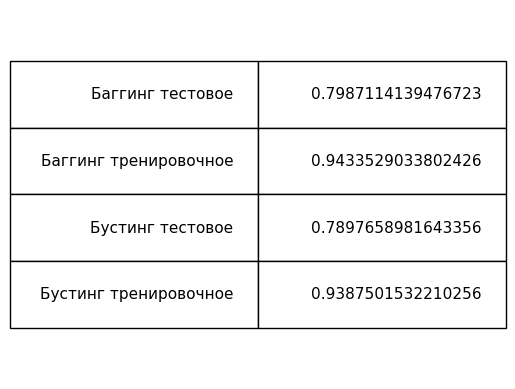

In [71]:
fig, ax = plt.subplots()

table_data=[
 ["Баггинг тестовое", f1_score(y_pred_test,y_test,average='macro')],
 ["Баггинг тренировочное", f1_score(y_pred_train,y_train,average='macro')],
 ["Бустинг тестовое", f1_score(y_pred_cat_test, y_test, average='macro')],
 ["Бустинг тренировочное", f1_score(y_pred_cat_train, y_train, average='macro')]
]

table = ax.table(cellText=table_data, loc='center')

table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')

plt.show()